# Лабораторная работа №1
**Выполнена студентом группы А-05-20 Ходосевичем Леонидом**

Вариант №25

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Задача 1.1
* вычислить значения машинного епсилон
* вычислить значение машинного нуля
* вычислить значение машинной бесконечности

In [3]:
# машинный эпсилон
eps = 1.0
while (1.0 + eps) != 1.0 :
    eps /= 2
print('Машинный епсилон : {:.2e}'.format(eps))
print(1 + eps*2)
print(1 + eps)

Машинный епсилон : 1.11e-16
1.0000000000000002
1.0


In [4]:
# машинный нуль
X0 = 1
t = 0
while X0 != 0 :
    X0 /= 2
    t +=1
X0 = 1
for i in range(t-1):
    X0 /= 2    
print('Машинный нуль : {:.2e} или 2^{}'.format(X0,-t)) #если это число разделить на 2 то будет 0

Машинный нуль : 4.94e-324 или 2^-1075


In [5]:
# машинная бесконечность
Xinf = 1.0
t = 0
while np.isinf(Xinf) != 1:
#while Xinf <= sys.float_info.max :     #пробовал через np.inf, не работает(
    Xinf *= 2
    t += 1
Xinf = 1
for i in range(t-1):
    Xinf *= 2
print('Машинная бесконечность : {:.2e} или 2^{}'.format(Xinf,t)) #если это число домножить на 2 то получим переполнение

Машинная бесконечность : 8.99e+307 или 2^1024


# Задача 1.2
исседовать поведение погрешности приближения функции $F(x) = arctg(x)$ на отрезке [0, 0.8]


разложение в ряд тейлора: 
$arctg(x) = \sum_{n = 1}^{\propto } \frac{(-1)^{(n-1)} x^{(2n - 1)}}{(2n - 1)} $

In [6]:
# функция
def F(x):
    return np.arctan(x)

#отрезки
a = 0.0
b = 0.8
x_range = np.linspace(a, b, 1000)

# нный член ряда тейлора
def n_teylor(x, n):
    return  (-1)**(n-1) * x**(2*n - 1) / (2*n - 1)

# сумма первых n членов
def S_n(x, n):
    res = 0
    for i in range (1,n+1,1):
        res += n_teylor(x, i)
    return res


**построим графики первых 5 сумм:**
* воспользуемся формулой тейлора 
* для каждого графика зададим свой цвет, который далее будет таким же для погрешностей

<class 'matplotlib.axes._subplots.AxesSubplot'>


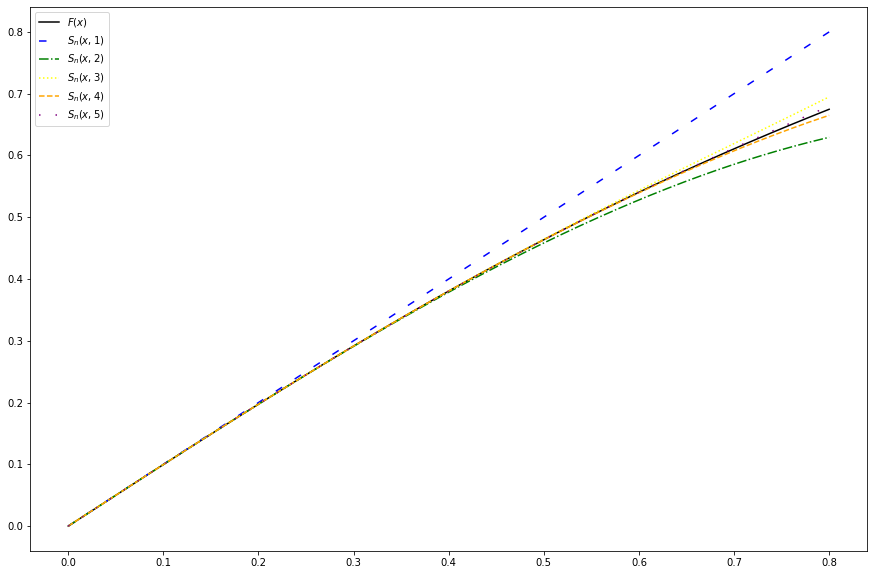

In [8]:
fig, ax = plt.subplots(1,1, figsize = (15, 10))

ax.plot(x_range, F(x_range), label = '$F(x)$', c = 'black')

colors = ('blue', 'green', 'yellow', 'orange', 'purple')
line_styles = ((0, (5, 10)), '-.', ':', '--', (0, (1, 10)) )

for i in range(1,6,1):
    ax.plot(x_range, S_n(x_range, i), label = f'$S_n(x,{i})$', ls = line_styles[i - 1], color = colors[i-1])

ax.legend()

**теперь графики для погрешностей(цвет совпадаем с цветом графика суммы**


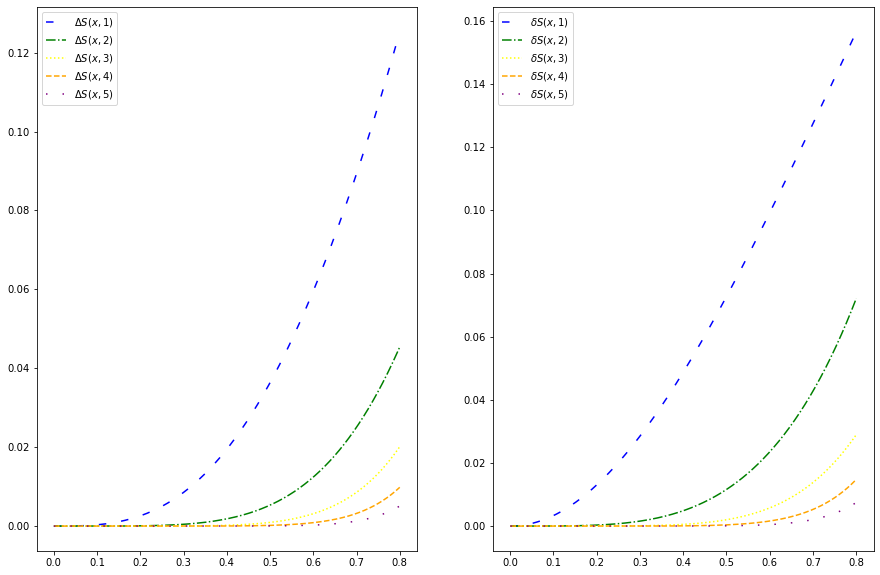

In [7]:
def abs_error(dx, x):
    return np.abs(dx - x)

def relative_error(dx, x):
    return abs_error(dx, x) / dx

fig, ax = plt.subplots(1,2, figsize = (15, 10))

line_styles = ((0, (5, 10)), '-.', ':', '--', (0, (1, 10)) )
for i in range(1,6,1):
    ax[0].plot(x_range, abs_error(S_n(x_range,i), F(x_range)), 
               label = f'$\Delta S(x,{i})$', ls = line_styles[i - 1], color = colors[i-1])

for i in range(1,6,1):
    ax[1].plot(x_range, relative_error(S_n(x_range,i), F(x_range)), 
               label = f'$\delta S(x,{i})$', ls = line_styles[i - 1], color = colors[i-1])

ax[0].legend()
ax[1].legend()

Определить количество членов ряда N, при котором величина относительной погрешности в средней точке отрезка станет меньше машинного эпсилон. Величину относительной погрешности вычислять как отношение прибавляемого члена к накопленной частичной сумме $S(x,N)$, взятое по модулю.

In [8]:
c = (a + b) / 2
Sum = n_teylor(c, 1) # первый член последовательности
N_machine_error = 2 # количество членов ряда с которого все начнется
n_term_1 = n_teylor(c, 2) # следующий член последовательности
while np.abs(n_term_1 / Sum) > eps:
    Sum += n_term_1
    N_machine_error += 1
    n_term_1 = n_teylor(c, N_machine_error)

print(N_machine_error)

20


**теперь построим графики погрешностей при количестве членов ряда, который мы посчитали выше**

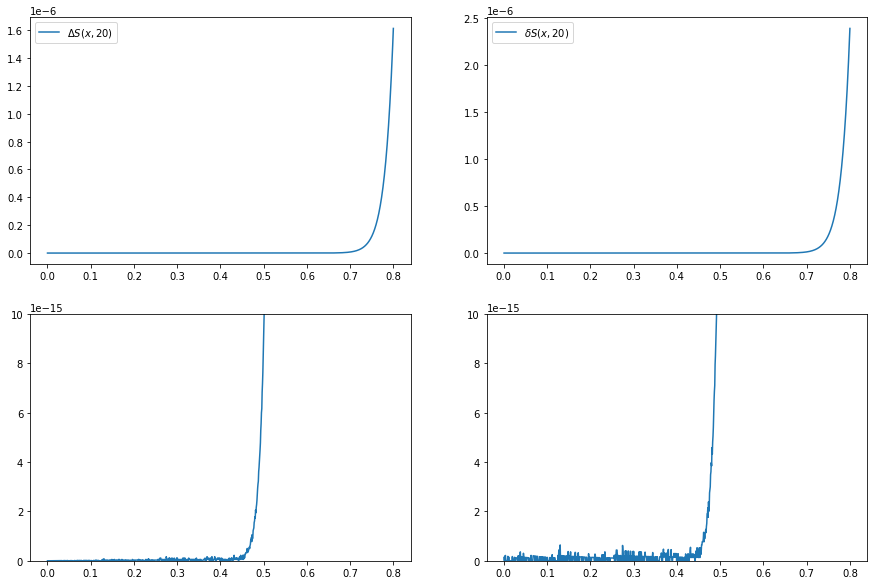

In [9]:
fig, ax = plt.subplots(2,2, figsize = (15, 10))


ax[0][0].plot(x_range, abs_error(S_n(x_range,N_machine_error), F(x_range)), label = f'$\Delta S(x,{N_machine_error})$')
ax[0][1].plot(x_range, relative_error(S_n(x_range,N_machine_error), F(x_range)), label = f'$\delta S(x,{N_machine_error})$')
ax[1][0].plot(x_range, abs_error(S_n(x_range,N_machine_error), F(x_range)), label = f'$\Delta S(x,{N_machine_error})$')
ax[1][1].plot(x_range, relative_error(S_n(x_range,N_machine_error), F(x_range)), label = f'$\delta S(x,{N_machine_error})$')

ax[1][0].set(ylim = (0.0, 10E-15))
ax[1][1].set(ylim = (0.0, 10E-15))
ax[0][0].legend()
ax[0][1].legend()
ax[0][0].legend()
ax[0][1].legend()

**Функция для округления до t-го знака мантиссы**

In [10]:
def ROUND(x, t = 4):
    return np.float64(np.format_float_scientific(x, precision=t))
    
print(ROUND(0.000001111111111111111111110,4))

1.1111e-06


**Функция считающая значение сумм ряда с округлением**

In [11]:
# ввод второй функции которая поэлементно обрабатывает массив связана с функцией округления, которая не может принимать массивы
def S_n_rounded_el(x, n):
    res = 0
    for i in range (1,n+1,1):
        res += ROUND(n_teylor(x, i), 6)
        res = ROUND(res, 6)
    return res
def S_n_rounded(x, n):
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_n_rounded_el(x[i], n)
    return res

#S_n_rounded(x_range, N_machine_error)

**Графики для погрешностей суммы с использованием функций округления**

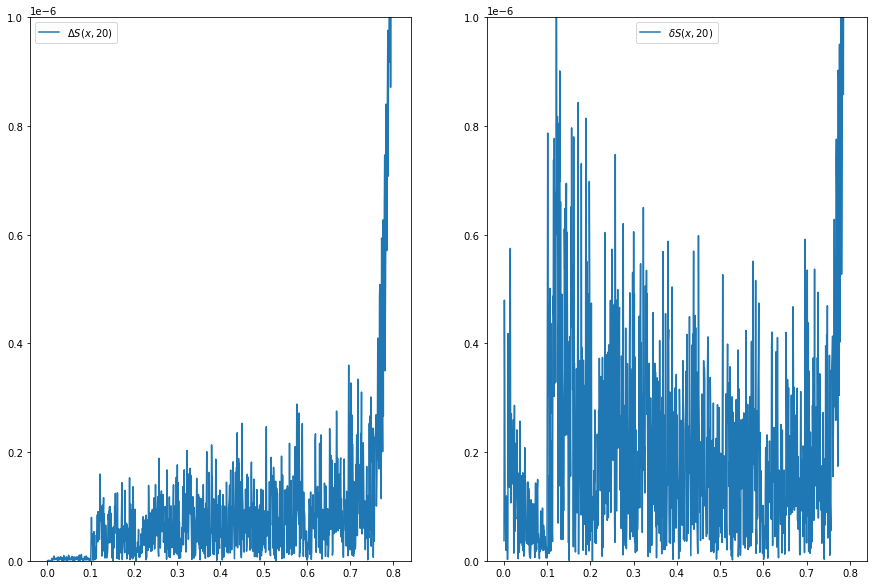

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15, 10))

line_styles = ((0, (5, 10)), '-.', ':', '--', (0, (1, 10)) )

ax[0].plot(x_range, np.abs(F(x_range) - S_n_rounded(x_range, N_machine_error)), 
            label = f'$\Delta S(x,{N_machine_error})$')

ax[1].plot(x_range, np.abs(F(x_range) - S_n_rounded(x_range, N_machine_error)) / S_n_rounded(x_range, N_machine_error), 
            label = f'$\delta S(x,{N_machine_error})$', )

ax[0].set(ylim = (0.0, 10E-7))
ax[1].set(ylim = (0.0, 10E-7))
ax[0].legend()
ax[1].legend()

Можем заметить, что погрешности без округления колеблятся от $10^{-16}$ (машинного епсилон) до $10^{-14}$.  
В то время, как на графиках с округлением они колеблются от $10^{-7}$ до $10^{-6}$. Тоесть если не округлять значения в процессе вычисления, то результаты будут значительно точнее.

# Задача 1.3
Дана функция $f(a,b,c)$. Значения переменных указаны в варианте со всеми верными цифрами.  
Оценить погрешность результата двумя способами:  
а) используя оценки погрешности для арифметических операций,  
б) используя общую формулу погрешностей.  
Результат представить в двух формах записи: с явным указанием погрешностей и с учетом количества верных цифр. 

* $f(a,b,c) = 2b^{2} - \frac{a}{c^{2}}$
* a = 13.123
* b = 1.45
* c = 3.18

# Решение №1
используем оценки погрешностей арифметических операций  
$\Delta a = 0.001$   
$\Delta b = 0.01$   
$\Delta c = 0.01$    
***
$\delta a = \Delta a / a$  
$\delta a = \Delta b / b$  
$\delta a = \Delta c / c$  

Находим значение функции

In [13]:
F = 2 * b**2 - (a / c**2)
print(F)

1.2800000000000002


Находим относительные погрешности входных данных

In [14]:
a = 13.123
b = 1.45
c = 3.18

abs_error_a = 0.001 #абсолютная погрешность а
abs_error_b = 0.01  #абсолютная погрешность b
abs_error_c = 0.01  #абсолютная погрешность c

relative_error_a = abs_error_a / a #относительная погрешность а
relative_error_b = abs_error_b / b #относительная погрешность b
relative_error_c = abs_error_c / c #относительная погрешность c
print(relative_error_a, relative_error_b, relative_error_c)

7.620208793720949e-05 0.006896551724137932 0.003144654088050314


Пользуемся формулами погрешностей арифметических операций:  
$\delta (ab) = \delta (\frac{a}{b}) \approx \delta (a) + \delta (b)  $  (1)  
$\Delta (a\pm b ) \leq \Delta a + \Delta b$  (2)  

In [15]:
relative_error_b_squared = relative_error_b + relative_error_b # относительная погрешность квадрата b
relative_error_c_squared = relative_error_c + relative_error_c # относительная погрешность квадрата c
print(relative_error_b_squared, relative_error_c_squared)

0.013793103448275864 0.006289308176100628


In [16]:
relative_error_a_divide_c_square = relative_error_c_squared + relative_error_a #относительная погрешность частного а и с^2
print(relative_error_a_divide_c_square)

0.006365510264037838


Тогда абсолютная погрешность этих выражений:

In [17]:
abs_error_b_squared = relative_error_b_squared * b**2 #абсолютная погрешность b^2
abs_error_a_divide_c_square = relative_error_a_divide_c_square * (a / c**2) #абсолютная погрешность a/c^2
print(abs_error_b_squared, abs_error_a_divide_c_square)

0.029000000000000005 0.008260609864618542


Тогда абсолютная погрешность f:

In [34]:
f_abs_error_1 = abs_error_b_squared + abs_error_a_divide_c_square #абсолютная погрешность всего выражения
print(f_abs_error_1)
print(f_abs_error_1 / F)

0.037260609864618544
0.02910985145673323


Применяя оценку (2) получаем: $\Delta (b^2 - \frac{a}{c^2}) \leq 0.037260609864618544  =  \Delta f(a,b,c)$   
Относительная погрешность тогда:  
$\delta f(a,b,c) = 0.02910985145673323$  

# Решение №2

$f(a,b,c) = 2b^{2} - \frac{a}{c^{2}}$  
Используем формулу для погрешности функции многих переменных  
$\Delta f(x) \approx \mid \sum_{j = 1}^{m} \frac{\partial f(x)}{\partial x_{j}} \mid \Delta x_{j}$

Для начала найдем частные производные по всем переменным:  

$\frac{\partial f}{b} = 4b $  
$\frac{\partial f}{a} = \frac{-1}{c^2} $    
$\frac{\partial f}{c} = \frac{2a}{c^3}  $  

абсолютные погрешности переменных у нас уже есть, остается лишь посчитать погрешность для f

In [35]:
#Считаем производные
f_derivative_b = 4 * b
f_derivative_a = -1 / c**2
f_derivative_c = 2 * a / c**3
print(f_derivative_b, f_derivative_a, f_derivative_c)

5.8 -0.09888849333491553 0.8161721371283626


In [36]:
f_abs_error_2 = f_derivative_a * abs_error_b + f_derivative_b * abs_error_c + f_derivative_a * abs_error_c
print(f_abs_error_2)
print(f_abs_error_2 / F)

0.05602223013330168
0.04376736729164193


Вторым способом величина абсолютной погрешности: $\Delta f(a,b,c) = 0.05602223013330168$  
Относительная погрешность тогда:    
$\delta f(a,b,c) = 0.04376736729164193$  

In [37]:
print(f_abs_error_1 / F)
print(f_abs_error_2 / F)

0.02910985145673323
0.04376736729164193


Ответ : 
1) $ f(13.123, 1.45, 3.18) = 2.90 \pm 0.04 $ и иметь он будет 2 значащие цифры  
2) $ f(13.123, 1.45, 3.18) = 2.90 \pm 0.06 $ и иметь он будет 2 значащие цифры  